In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from math import sqrt
import matplotlib

In [2]:
sales=pd.read_csv('C:\\Users\\donatus kilolo\\Documents\\sales_data_sample.csv', encoding = 'unicode_escape')
sales.head(2)

,ORDERNUMBER,PRICEEACH,ORDERLINENUMBER,ORDERDATE,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,COUNTRY,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,QUANTITYORDERED,Discount,Profit,DEALSIZE
0,10107,95.70,2,2/24/2003 0:00,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,USA,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,30,0.0,41.9136,Small
1,10121,81.35,5,05/07/2003 00:00,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,France,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,34,0.0,219.5820,Small


In [48]:
#sales.columns

Index(['ORDERNUMBER', 'PRICEEACH', 'ORDERLINENUMBER', 'ORDERDATE', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'COUNTRY',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'QUANTITYORDERED', 'Discount',
       'Profit', 'DEALSIZE', '% profit'],
      dtype='object')

In [4]:
#sales.info()

In [21]:
pd.DataFrame(sales.groupby('Ship Mode').sum()['Sales'])
#we can plot as below
#sales["Ship Mode"].value_counts().plot(kind="bar")

,Sales
Ship Mode,
First Class,122037.1360
Same Day,41990.8170
Second Class,142938.4676
Standard Class,370841.1036


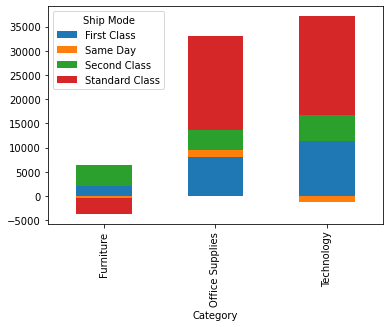

In [6]:
pd.crosstab(index=sales["Category"],columns=sales["Ship Mode"],values=sales["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

From the above we can see that most items were shipped in Standard Class while very few accross were shipped the same day.

In [19]:
pd.DataFrame(sales.groupby('Segment').sum()['Sales'])
#We can also plot
#sales["Segment"].value_counts().plot(kind="bar")

,Sales
Segment,
Consumer,347031.9274
Corporate,189509.4011
Home Office,141266.1957


In [20]:
pd.DataFrame(sales.groupby('COUNTRY').sum()['Sales'].sort_values())

,Sales
COUNTRY,
Ireland,4693.7400
Philippines,5332.3260
Belgium,7910.4248
Switzerland,8464.3710
Germany,8944.3680
Japan,10019.1220
Austria,11168.2466
Denmark,11618.3920
Singapore,18698.3760


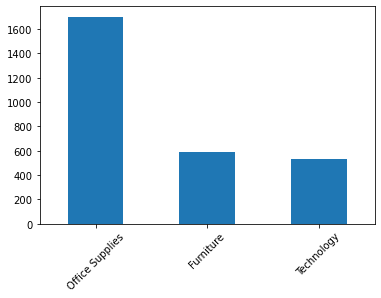

In [9]:
sales.Category.value_counts().plot(kind='bar')
#sales['Category'].value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

In [10]:
pd.crosstab(sales['Sub-Category'],sales['Category'])

Category,Furniture,Office Supplies,Technology
Sub-Category,,,
Accessories,0,0,225
Appliances,0,129,0
Art,0,232,0
Binders,0,419,0
Bookcases,63,0,0
Chairs,159,0,0
Copiers,0,0,14
Envelopes,0,73,0
Fasteners,0,68,0


[]

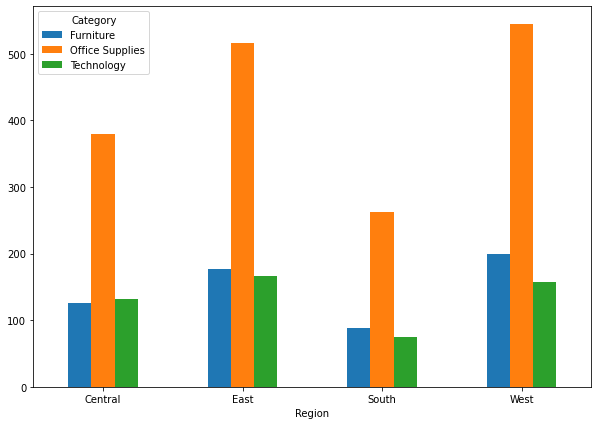

In [11]:
pd.crosstab(sales['Region'],sales['Category']).plot(kind='bar', figsize=(10,7))
plt.xticks(rotation=0)
plt.plot()

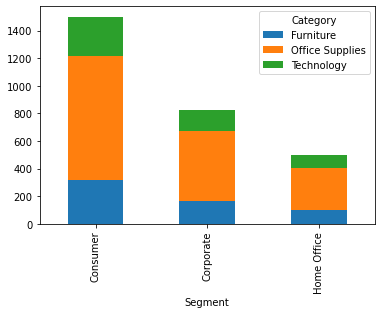

In [12]:
pd.crosstab(sales['Segment'],sales['Category']).plot(kind="bar",stacked=True)

Inferences/Insights

Office Supplies sold most accross all customer segments

In [50]:
#Which product is being ordered most
pd.DataFrame(sales.groupby('Product Name').sum()['QUANTITYORDERED'].sort_values(ascending = False))

,QUANTITYORDERED
Product Name,
Easy-staple paper,550
Staples,488
Staple envelope,416
"Belkin 19"" Vented Equipment Shelf, Black",290
3M Hangers With Command Adhesive,258
...,...
Global Commerce Series Low-Back Swivel/Tilt Chairs,18
Harmony Air Purifier,15
Avery Poly Binder Pockets,12


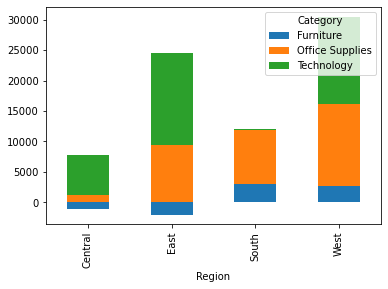

In [13]:
#Which category is selling most in each reagion?
pd.crosstab(sales["Region"],sales["Category"],sales["Profit"],aggfunc='sum').plot(kind="bar",stacked=True)

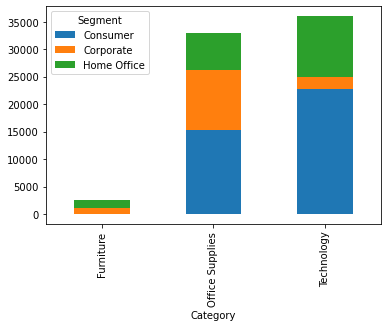

In [14]:
pd.crosstab(index=sales["Category"],columns=sales["Segment"],values=sales["Profit"],aggfunc="sum").plot(kind="bar",stacked=True)

The above output shows more profit in Technology coming from consumers and least profit in Funiture. 

In [22]:
pd.DataFrame(sales['Sub-Category'].value_counts())
#We can plot 
#sales['Sub-Category'].value_counts().plot(kind="bar")

,Sub-Category
Binders,419
Paper,378
Furnishings,266
Phones,260
Storage,248
Art,232
Accessories,225
Chairs,159
Appliances,129
Labels,112


#### Dealing with Profits

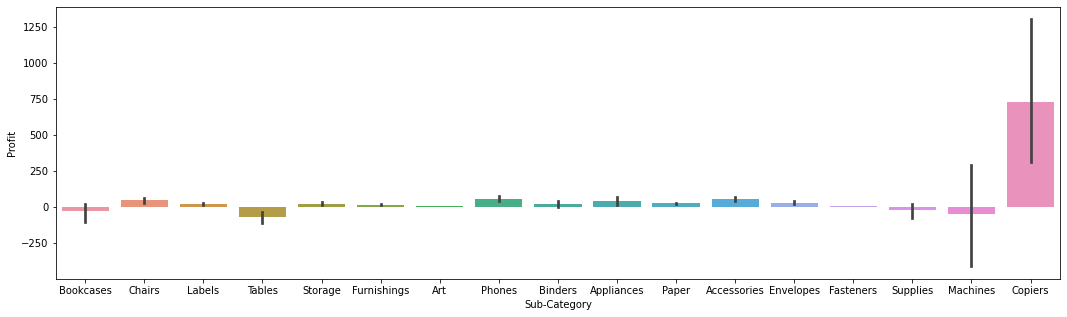

In [16]:
import seaborn as sns
axes,fig=plt.subplots(0,1,figsize=(18,5))
sns.barplot("Sub-Category","Profit",data=sales)
#https://www.kaggle.com/shreyashitiwari/eda-superstore-data

From the above plot it's observable that Copiers brought more profits but Fasteners Art and Furnishings brought least profit.

In [17]:
#Let's calculate the %ge profit in sales and add the %gecolumn:
sales['% profit'] = sales['Profit']/sales['Sales']*100
sales.head(3)

,ORDERNUMBER,PRICEEACH,ORDERLINENUMBER,ORDERDATE,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,COUNTRY,...,Product ID,Category,Sub-Category,Product Name,Sales,QUANTITYORDERED,Discount,Profit,DEALSIZE,% profit
0,10107,95.70,2,2/24/2003 0:00,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,USA,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,30,0.0,41.9136,Small,16.0
1,10121,81.35,5,05/07/2003 00:00,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,France,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,34,0.0,219.5820,Small,30.0
2,10134,94.74,2,07/01/2003 00:00,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,France,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,41,0.0,6.8714,Medium,47.0


#### 5 Profit in each city, state and region

##### 5.1 City profit

In [35]:
city_profit = pd.DataFrame(sales.groupby('City').sum()['Profit'])
city_profit.sort_values(by='Profit',ascending=False).head()

,Profit
City,
New York City,19772.8320
San Francisco,6260.9337
Seattle,6241.4278
Los Angeles,5889.0441
Atlanta,3322.7448


We discover that:
    
New York City gave most profit
but Philadelphia had least. 

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x=city_profit.index, y=city_profit.values)
plt.xticks(rotation=90)
plt.show()

Exception: Data must be 1-dimensional

<Figure size 1080x360 with 0 Axes>

The above plot shows that the cities are too many to fit in the bar. So we can plot for States instead of cities and understand which states are profitable to trade.

#### 5.2 State's Profit

In [41]:
# state wise sale
state_profit = pd.DataFrame(sales.groupby('State').sum()['Profit'])
state_profit.sort_values(by='Profit',ascending=False).head()

,Profit
State,
New York,24566.9024
California,19348.9945
Washington,8276.0832
Georgia,6670.7638
Michigan,5549.6139


#### 5.3 Regional Profit

In [42]:
# region wise sale
region_profit = pd.DataFrame(sales.groupby('Region').sum()['Profit'])
region_profit.sort_values(by='Profit',ascending=False).head()

,Profit
Region,
West,30465.1668
East,22570.6394
South,11965.4861
Central,6657.4400


<ipython-input-43-073c83e1bf21>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(region_profit, labels=region_profit.index, autopct='%.2f')


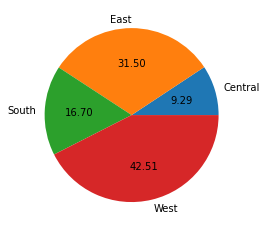

In [43]:
plt.pie(region_profit, labels=region_profit.index, autopct='%.2f')
plt.show()

#### 6 Dealing with sales at each city, state and region

##### 6.1 City sales

In [34]:
# city wise sale:
city_sale = pd.DataFrame(sales.groupby('City').sum()['Sales'])
city_sale.sort_values(by='Sales',ascending=False).head(10)

,Sales
City,
New York City,89000.8170
Los Angeles,42642.8710
San Francisco,41150.9120
Philadelphia,37130.8230
Jacksonville,28292.0830
Seattle,25854.4180
Houston,19953.8988
Chicago,14093.7480
San Antonio,13276.2730


In [46]:
# state wise sale
state_sale = pd.DataFrame(sales.groupby('State').sum()['Sales'])
state_sale.sort_values(by='Sales',ascending=False).head(10)

,Sales
State,
California,125457.8030
New York,109413.6510
Texas,57985.5682
Florida,39787.5610
Pennsylvania,38603.3690
Washington,34346.3340
Michigan,21681.2630
Illinois,21053.6940
Ohio,19399.4010


In [45]:
# region wise sale
region_sale = pd.DataFrame(sales.groupby('Region').sum()['Sales'])
region_sale.sort_values(by='Sales',ascending=False).head(10)

,Sales
Region,
West,212461.9510
East,200108.3360
Central,144940.9252
South,120296.3120


In [47]:
#Which product is selling most

sales.groupby('Product Name').sum()['Quantity'].sort_values(ascending = False)

KeyError: 'Quantity'

In [54]:
#Who is the loyal/returning customer and how can we reward her/him? how can we motivate other customers?
sales.groupby(['Customer ID','Customer Name']).count()['ORDERNUMBER'].sort_values(ascending=False)

Customer ID  Customer Name    
JE-15745     Joel Eaton           18
ZC-21910     Zuschuss Carroll     18
NP-18325     Naresj Patel         16
KL-16645     Ken Lonsdale         16
BM-11650     Brian Moss           15
                                  ..
CM-12235     Chris McAfee          1
CL-12700     Craig Leslie          1
SJ-20500     Shirley Jackson       1
KN-16390     Katherine Nockton     1
MJ-17740     Max Jones             1
Name: ORDERNUMBER, Length: 662, dtype: int64

#### 8 Which month customers ordered most and least?

In [ ]:
#todate

In [55]:
#We first need to convert into dateTime object then create Order_Month Column to answer our question
import datetime as dt
sales['Order_Month']=sales['ORDERDATE'].dt.month
sales
#This code creates a new feature called 'Order_Month' and adds it to the dataset

AttributeError: Can only use .dt accessor with datetimelike values

In [56]:
#Then we want to see the exact understandable months
sales['Order Date'].dt.strftime('%B')

KeyError: 'Order Date'

#### 9 Which month sold most which category?

#### 10 Which month made most profit?

In [57]:
sales.groupby(['Order_Month']).max()['Profit']

KeyError: 'Order_Month'

In [59]:
sales.groupby(['Order_Month'],)['State','Profit']

KeyError: 'Order_Month'

In [60]:
#We can also create the Year feature/column and continue exploring more like above
sales['Year'] = sales['Order Date'].dt.year
sales.head()

KeyError: 'Order Date'

In [61]:
#https://www.kaggle.com/abhaymhatre/us-superstore-analysis

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
test = y['2017-01-01':]
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
test.plot(label='test data', color = 'green')
ax = y[:'2017-01-01'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse=mean_squared_error(y_truth,y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
rmse = sqrt(mean_squared_error(y_truth,y_forecasted))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

In [ ]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

https://www.kaggle.com/yesdeepakmittal/business-sales-dashboard
https://www.kaggle.com/abhaymhatre/us-superstore-analysis
https://www.kaggle.com/shreyashitiwari/eda-superstore-data
https://www.kaggle.com/branddata/eda-us-superstore-data
https://www.kaggle.com/juhi1994/superstore-analysis
https://www.kaggle.com/vishrath/sales-data-basic-analysis